# Buffalo 311 Forecast
### Joey Finley - DAT 512 - Spring 2023

In [1]:
!pip3 install prophet

In [1]:
# This code will load in the necessary Python libraries using the import statement.
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from datetime import datetime
from datetime import timedelta
%matplotlib inline
import prophet as Prophet
import warnings
warnings.filterwarnings('ignore')
import urllib.request
import json
import time
import holidays

In [2]:
# The below code will create a parameters dictionary for filtered information in the request. 
params_dict = {
    '$where':'date_extract_y(open_date)>=2020',
    '$limit':500000,
}

# The below code is assigning the 'uri' variable to the URL endpoint where the request is being sent.
uri = ' https://data.buffalony.gov/resource/whkc-e5vr.json'

#The below code is assigning the 'r' variable to the GET request with the assigned parameters to the URL.
r =requests.get(uri,params=params_dict)

# This print statement outputs the status code of the request (200 means the request was accepted).
print('Status code:',r.status_code)

# This print statement outputs tthe number of rows pulled from the request with the filtered parameters.
print('Number of rows returned:',len(r.json()))

# This print statement outputs the the requested URL that includes the parameters at the end of the URL.
print('Endoced URI with params:',r.url)

Status code: 200
Number of rows returned: 279265
Endoced URI with params: https://data.buffalony.gov/resource/whkc-e5vr.json?%24where=date_extract_y%28open_date%29%3E%3D2020&%24limit=500000


In [3]:
# This will normalize the JSON data into a flat table-like structure
df = pd.json_normalize(r.json())

In [4]:
# The below code will create a variable 'df' which will create a Pandas dataframe (tabular model) of data from the
# requested data. Additionally, the head (first and last 5 rows of the dataframe) will be outputed.
df = pd.DataFrame(r.json())
print(df.shape)
df.head()
df

(279265, 33)


,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_line_1,city,...,census_block_2010,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,address_number,property_id,x_coordinate,y_coordinate,address_line_2
0,1001805272,2023-03-09T09:49:00.000,2023-03-09T10:02:00.000,Closed,Dept of Public Works,Engineering - Street Repairs,Paving (Req_Serv),Street,KIRKPATRICK,Buffalo,...,4001,000200,36029000200,360290002004,360290002004001,NaN,NaN,NaN,NaN,NaN
1,1001788769,2023-02-07T15:04:00.000,2023-02-14T10:35:00.000,Closed,Dept of Public Works,Sanitation,Totes Replace (Req_Serv),Property,BROADWAY,Buffalo,...,2010,002801,36029002801,360290028011,360290028011005,1358,112.23-12-13,-8774730.591,5296131.1923,NaN
2,1001805334,2023-03-09T11:11:00.000,2023-03-13T17:33:00.000,Closed,Office of the Mayor,Citizen Services - Quick Response Teams,QRT Other Issue (Req_Serv),Property,GLENWOOD,Buffalo,...,4000,003400,36029003400,360290034004,360290034004000,940,101.38-1-16,-8775343.69,5298636.9605,NaN
3,1001805712,2023-03-12T16:35:00.000,2023-03-27T07:15:00.000,Closed,DPIS,Housing,Housing Violations (Req_Serv),Property,LA SALLE,Buffalo,...,2003,004701,36029004701,360290047011,360290047011003,385,79.72-4-10,-8773772.1,5303593.7302,NaN
4,1001836852,2023-04-28T08:43:00.000,2023-04-28T09:23:00.000,Closed,Dept of Parking,Parking Violations Bureau,Parking Issues (Req_Serv),Property,MULBERRY,Buffalo,...,3014,003100,36029003100,360290031003,360290031003015,225,100.80-5-39,-8778757.159,5296688.8027,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279260,1001695754,2022-08-24T14:51:00.000,2022-10-06T13:16:00.000,Closed,Dept of Public Works,Engineering - Street Repairs,Damaged Street Light Pole (Req_Serv),Property,COLUMBUS,Buffalo,...,3004,000800,36029000800,360290008003,360290008003004,185,133.40-3-10,-8773875.464,5288915.0967,NaN
279261,1001681941,2022-08-11T13:07:00.000,2022-08-25T11:56:00.000,Closed,Dept of Public Works,Sanitation,Totes Replace (Req_Serv),Property,LA SALLE,Buffalo,...,3003,004300,36029004300,360290043003,360290043003003,654,79.74-7-26,-8772851.601,5303636.5693,NaN
279262,1001695718,2022-08-24T13:46:00.000,2022-08-24T22:04:00.000,Closed,Dept of Public Works,Forestry,Tree Trimming Request (Req_Serv),Property,MARBETH,Buffalo,...,1003,000900,36029000900,360290009001,360290009001003,30,123.79-3-2,-8774393.371,5290152.9296,NaN
279263,1001711387,2022-09-13T20:34:00.000,2022-09-27T06:01:00.000,Closed,Dept of Public Works,Engineering - Street Repairs,Paving (Req_Serv),Street,WINSPEAR,Buffalo,...,4001,000200,36029000200,360290002004,360290002004001,NaN,NaN,NaN,NaN,NaN


In [5]:
# This will add a column 'count' to the dataframe and assign '1' to each line item representing each 311 call
df['count'] = 1
df.head()

,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_line_1,city,...,tractce20,geoid20_tract,geoid20_blockgroup,geoid20_block,address_number,property_id,x_coordinate,y_coordinate,address_line_2,count
0,1001805272,2023-03-09T09:49:00.000,2023-03-09T10:02:00.000,Closed,Dept of Public Works,Engineering - Street Repairs,Paving (Req_Serv),Street,KIRKPATRICK,Buffalo,...,000200,36029000200,360290002004,360290002004001,NaN,NaN,NaN,NaN,NaN,1
1,1001788769,2023-02-07T15:04:00.000,2023-02-14T10:35:00.000,Closed,Dept of Public Works,Sanitation,Totes Replace (Req_Serv),Property,BROADWAY,Buffalo,...,002801,36029002801,360290028011,360290028011005,1358,112.23-12-13,-8774730.591,5296131.1923,NaN,1
2,1001805334,2023-03-09T11:11:00.000,2023-03-13T17:33:00.000,Closed,Office of the Mayor,Citizen Services - Quick Response Teams,QRT Other Issue (Req_Serv),Property,GLENWOOD,Buffalo,...,003400,36029003400,360290034004,360290034004000,940,101.38-1-16,-8775343.69,5298636.9605,NaN,1
3,1001805712,2023-03-12T16:35:00.000,2023-03-27T07:15:00.000,Closed,DPIS,Housing,Housing Violations (Req_Serv),Property,LA SALLE,Buffalo,...,004701,36029004701,360290047011,360290047011003,385,79.72-4-10,-8773772.1,5303593.7302,NaN,1
4,1001836852,2023-04-28T08:43:00.000,2023-04-28T09:23:00.000,Closed,Dept of Parking,Parking Violations Bureau,Parking Issues (Req_Serv),Property,MULBERRY,Buffalo,...,003100,36029003100,360290031003,360290031003015,225,100.80-5-39,-8778757.159,5296688.8027,NaN,1


In [6]:
# This will create a new column, 'open_dt' in the df that will be the open_date column converted to date_time
df['open_dt']=pd.to_datetime(df['open_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279265 entries, 0 to 279264
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   case_reference           279265 non-null  object        
 1   open_date                279265 non-null  object        
 2   closed_date              273631 non-null  object        
 3   status                   279265 non-null  object        
 4   subject                  279265 non-null  object        
 5   reason                   279265 non-null  object        
 6   type                     279265 non-null  object        
 7   object_type              279265 non-null  object        
 8   address_line_1           276848 non-null  object        
 9   city                     279265 non-null  object        
 10  state                    279265 non-null  object        
 11  zip_code                 279265 non-null  object        
 12  location        

In [7]:
# This will create a new dataframe that pulls only the open-dt and count columns from the original df
df1 = df[['open_dt', 'count']]
df1.head()

,open_dt,count
0,2023-03-09 09:49:00,1
1,2023-02-07 15:04:00,1
2,2023-03-09 11:11:00,1
3,2023-03-12 16:35:00,1
4,2023-04-28 08:43:00,1


In [8]:
#This will convert the new df date columm into date time wiht only the year, month, and day
df1['open_dt'] = pd.to_datetime(df1['open_dt']).dt.strftime('%Y-%m-%d')
df1.head()

,open_dt,count
0,2023-03-09,1
1,2023-02-07,1
2,2023-03-09,1
3,2023-03-12,1
4,2023-04-28,1


In [9]:
# This creates a 3rd dataframe that groups the previous df by the date and sums the mumber of 311 calls on that date
df2 = df1.groupby(['open_dt']).count().reset_index()

In [10]:
# This provides a summary of the dataframe structure, confirming the data types for the two columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   open_dt  1221 non-null   object
 1   count    1221 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 19.2+ KB


In [11]:
# This will convert the df2 date column to datetime, since shown above, it was object
df2['open_dt'] = pd.to_datetime(df2['open_dt'])

In [12]:
# This sets the index of the dataframe to be the date column
df2 = df2.set_index('open_dt')

In [13]:
df2.head()

,count
open_dt,
2020-01-01,12
2020-01-02,294
2020-01-03,230
2020-01-04,14
2020-01-05,7


In [14]:
# This will create a new dataframe that mirrors a previous dataframe
df_date = df1.copy()

In [15]:
# This will do just like previous steps, changing data types and pulling only year, month, and date, reset the index,
# and group by dates again.
df_date['open_dt'] = pd.to_datetime(df_date['open_dt']).dt.strftime('%Y-%m-%d')
df_date = df_date.groupby(['open_dt']).count().reset_index()
df_date['open_dt'] = pd.to_datetime(df_date['open_dt'])
df_date = df_date.set_index('open_dt')

In [16]:
df_date.head()

,count
open_dt,
2020-01-01,12
2020-01-02,294
2020-01-03,230
2020-01-04,14
2020-01-05,7


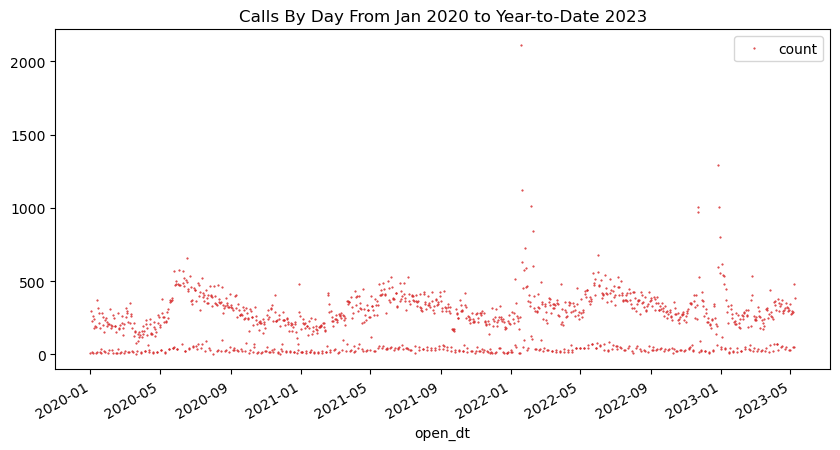

In [17]:
# This graph illustrates the number of 311 calls from the start of the data (1/1/20) to the current date.
# As shown below, January 2020 had a major outlier with over 2000 calls. Why?
color_pal = sns.color_palette()
df_date.plot(style='.',
         figsize=(10,5),
         ms=1,
         color = color_pal[3],
         title='Calls By Day From Jan 2020 to Year-to-Date 2023')
plt.show()

In [18]:
# This creates a new df that takes the previous df and resets the index to normal.
df_count = df1.groupby(['open_dt']).count().reset_index()

In [19]:
df_count.head()

,open_dt,count
0,2020-01-01,12
1,2020-01-02,294
2,2020-01-03,230
3,2020-01-04,14
4,2020-01-05,7


In [20]:
# This will convert the df2 date column to datetime
df_count['open_dt'] = pd.to_datetime(df_count['open_dt'])

In [21]:
# This will create an end data for the dataframe, ending 12/31/2022
end_date = pd.to_datetime('2022-12-31')

# This will make sure no information in the df is after the end date listed above
df_count = df_count[df_count['open_dt'] <= end_date]


In [22]:
# This will change the columm names to what is needed for the Prophet model
df_count = df_count.rename(columns={'open_dt':'ds', 'count':'y'})
df_count.head()

,ds,y
0,2020-01-01,12
1,2020-01-02,294
2,2020-01-03,230
3,2020-01-04,14
4,2020-01-05,7


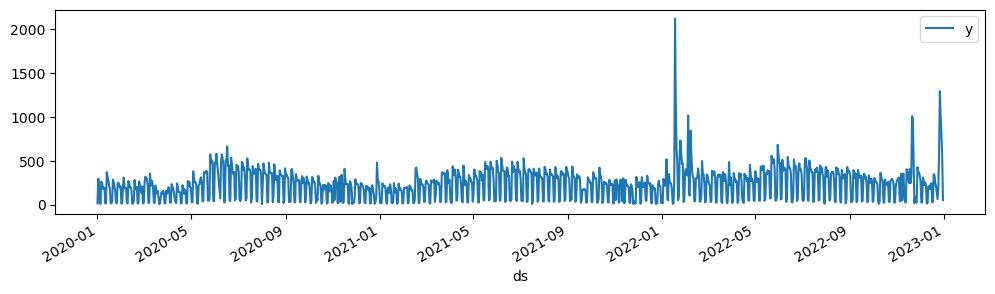

In [23]:
# This shows the number of calls between January 1st 2020 and December 31st 2022. In January 2022, the call
# center received more than 2,00 calls in one day.
ax = df_count.plot(x='ds', y='y', kind='line', figsize = (12,3))
plt.show()

In [24]:
# This is confirming that the last date is 12-31-2022 in the df
latest_date = df_count['ds'].max()
print(latest_date)

2022-12-31 00:00:00


In [25]:
# This is repeating the steps of setting and end date and filtering the df to be before or on that date
end_date = pd.to_datetime('2022-12-31')
df_count = df_count[df_count['ds'] <= end_date]

In [26]:
# This instantiates the forecasting model
model = Prophet.Prophet()

# This fits the model into the specific dataframe
model.fit(df_count)

19:58:37 - cmdstanpy - INFO - Chain [1] start processing
19:58:37 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
# Checking the type of the model to confirm it is prophet forecast
type(model)

prophet.forecaster.Prophet

In [28]:
# This creates a dataframe with future dates for predicting, and displays the tail of the df
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
1111,2024-08-31
1112,2024-09-30
1113,2024-10-31
1114,2024-11-30
1115,2024-12-31


In [29]:
# Add predictions to the forecast dataframe
forecast = model.predict(future)

In [30]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,128.394182,61.094375,351.284432,128.394182,128.394182,75.002024,75.002024,75.002024,81.602494,81.602494,81.602494,-6.600470,-6.600470,-6.600470,0.0,0.0,0.0,203.396207
1,2020-01-02,128.920497,46.634454,344.014964,128.920497,128.920497,62.430072,62.430072,62.430072,65.431661,65.431661,65.431661,-3.001589,-3.001589,-3.001589,0.0,0.0,0.0,191.350569
2,2020-01-03,129.446811,22.524762,314.941100,129.446811,129.446811,35.782017,35.782017,35.782017,35.324089,35.324089,35.324089,0.457928,0.457928,0.457928,0.0,0.0,0.0,165.228828
3,2020-01-04,129.973125,-202.197296,80.062627,129.973125,129.973125,-195.963476,-195.963476,-195.963476,-199.756230,-199.756230,-199.756230,3.792754,3.792754,3.792754,0.0,0.0,0.0,-65.990351
4,2020-01-05,130.499439,-195.630383,92.668388,130.499439,130.499439,-183.309320,-183.309320,-183.309320,-190.328945,-190.328945,-190.328945,7.019625,7.019625,7.019625,0.0,0.0,0.0,-52.809881


In [31]:
# This will transpose the tail of the dataframe
forecast.tail().T

,1111,1112,1113,1114,1115
ds,2024-08-31 00:00:00,2024-09-30 00:00:00,2024-10-31 00:00:00,2024-11-30 00:00:00,2024-12-31 00:00:00
trend,447.2906,454.180572,461.300209,468.190181,475.309818
yhat_lower,78.142566,302.176827,251.182283,-7.287718,353.75555
yhat_upper,442.103853,679.46693,632.372925,397.53407,778.782069
trend_lower,328.95566,325.556693,324.196217,320.132064,317.614147
trend_upper,549.436895,564.167952,580.228984,595.147428,614.246061
additive_terms,-189.096031,46.866005,-14.889954,-263.935167,109.136988
additive_terms_lower,-189.096031,46.866005,-14.889954,-263.935167,109.136988
additive_terms_upper,-189.096031,46.866005,-14.889954,-263.935167,109.136988
weekly,-199.75623,91.066547,65.431661,-199.75623,116.660384


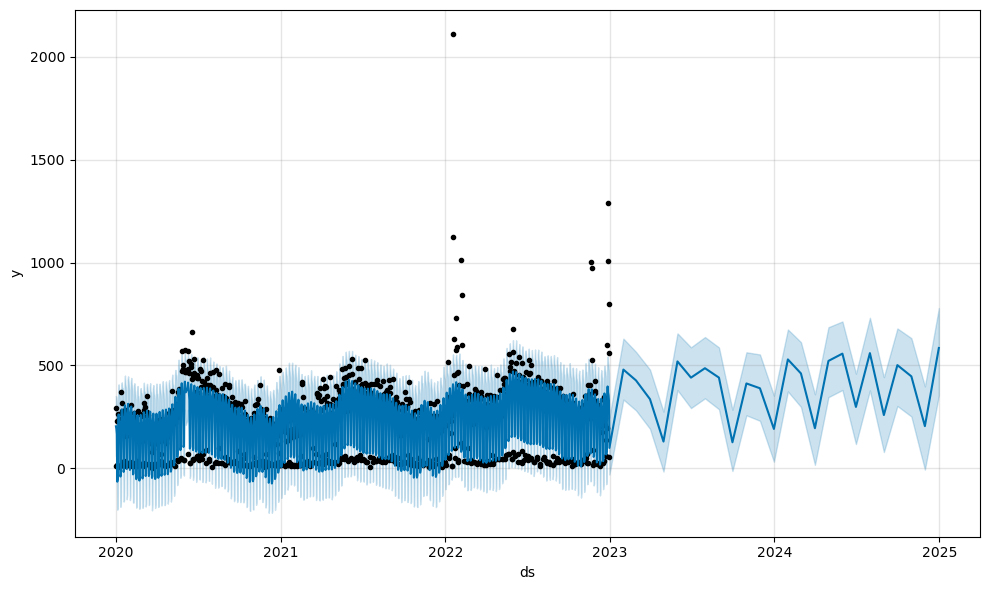

In [32]:
# This plots the forecast, which project the next 24 months.
model.plot(forecast);

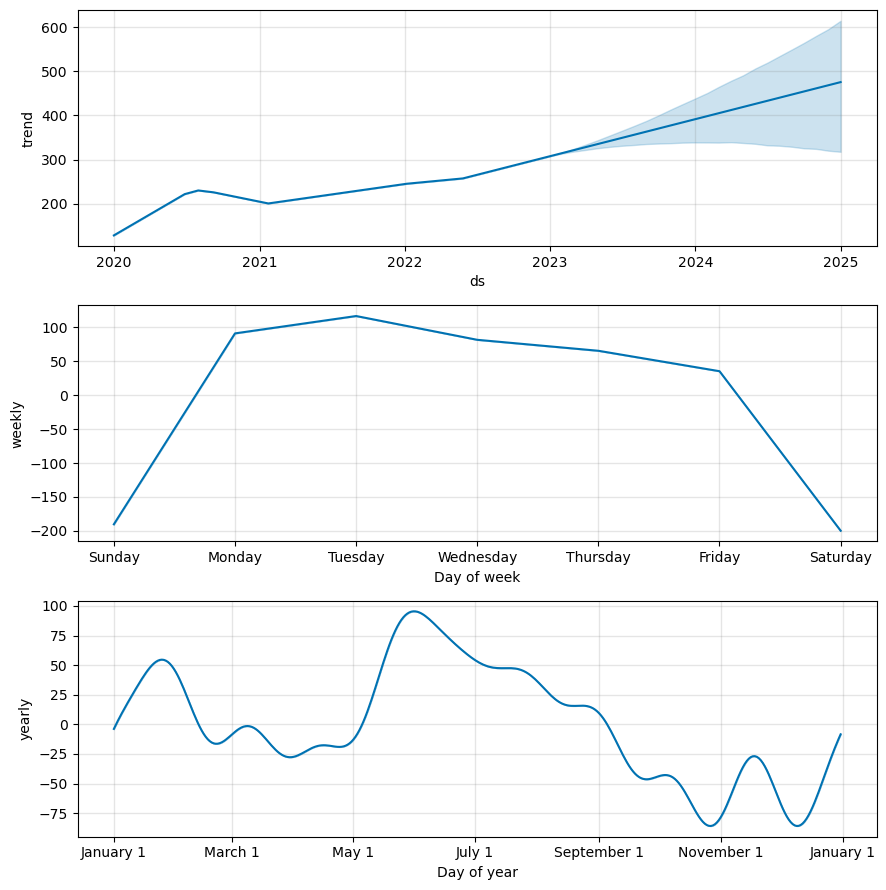

In [43]:
# This will plot the forecast based off actual numbers from prior into a year, day of week, and monthly view
model.plot_components(forecast);

In [44]:
import holidays
us_holidays = holidays.UnitedStates(years = [2020,2021,2022]) 

holidays = pd.DataFrame({
    'holiday': us_holidays.values(),
    'ds': us_holidays.keys(),
    'lower_window': 0,
    'upper_window': 0, })  
holidays

,holiday,ds,lower_window,upper_window
0,New Year's Day,2020-01-01,0,0
1,Martin Luther King Jr. Day,2020-01-20,0,0
2,Washington's Birthday,2020-02-17,0,0
3,Memorial Day,2020-05-25,0,0
4,Independence Day,2020-07-04,0,0
5,Independence Day (Observed),2020-07-03,0,0
6,Labor Day,2020-09-07,0,0
7,Columbus Day,2020-10-12,0,0
8,Veterans Day,2020-11-11,0,0
9,Thanksgiving,2020-11-26,0,0


In [45]:
# Prophet model with holidays
model2 = Prophet.Prophet(holidays=holidays,
                weekly_seasonality=False)

# Fit the model to the df
model2.fit(df_count)

21:38:34 - cmdstanpy - INFO - Chain [1] start processing
21:38:34 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
# Add future dates into model, next 24 months
future2 = model2.make_future_dataframe(periods=24, freq = 'm')
future2.tail()
forecast2 = model2.predict(future)
forecast2.head().T

,0,1,2,3,4
ds,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00
trend,174.410438,174.569462,174.728485,174.887509,175.046532
yhat_lower,-234.8444,-32.30762,-27.375993,-18.80167,-14.585027
yhat_upper,182.12008,389.669535,395.886355,397.55007,395.109394
trend_lower,174.410438,174.569462,174.728485,174.887509,175.046532
...,...,...,...,...,...
yearly_upper,3.125821,5.40408,7.293765,8.835216,10.075827
multiplicative_terms,0.0,0.0,0.0,0.0,0.0
multiplicative_terms_lower,0.0,0.0,0.0,0.0,0.0
multiplicative_terms_upper,0.0,0.0,0.0,0.0,0.0


In [47]:
future2['ds'] = future2['ds'].to_numpy().astype('datetime64[M]')

In [48]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1111,2024-08-31,379.697817,165.518649,603.667208
1112,2024-09-30,318.982886,120.253450,528.740766
1113,2024-10-31,283.156153,63.079513,495.817698
1114,2024-11-30,309.779721,85.557691,518.920832
1115,2024-12-31,374.332734,181.641634,591.882221


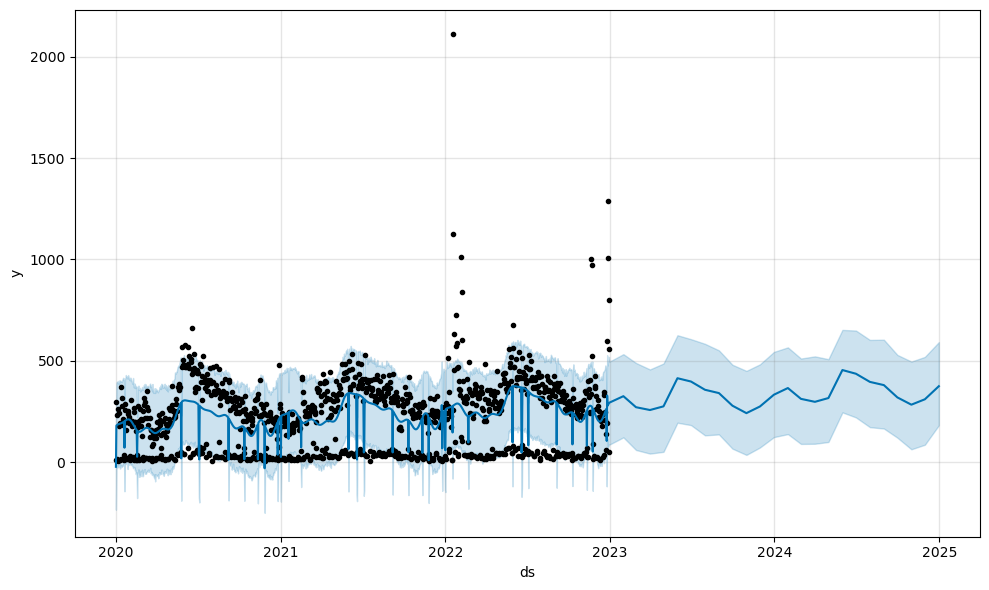

In [49]:
# This shows the prediction model with holidays
model2.plot(forecast2);

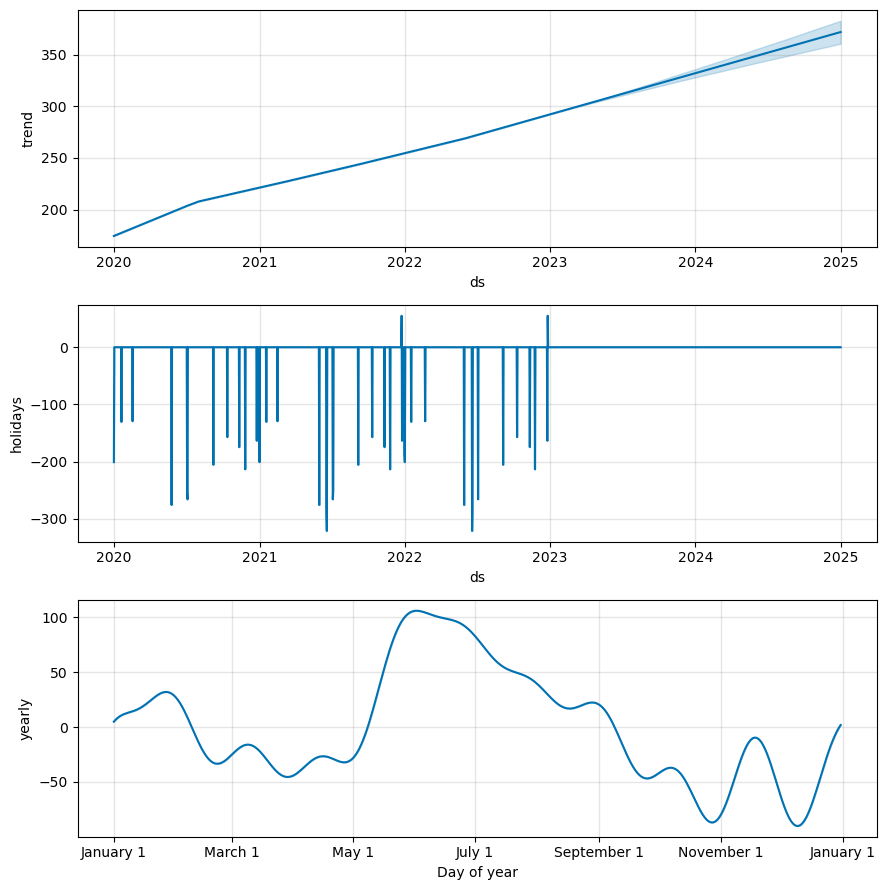

In [50]:
# Yearly and day of week with holidays.
model2.plot_components(forecast2);